In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set_labels=pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\Coursework\semester 4\MLPR\MLPR_project\data\training_set_labels.csv')
training_set_values=pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\Coursework\semester 4\MLPR\MLPR_project\data\traning_set_values.csv') 


Train_data = pd.merge(training_set_values, training_set_labels, on='id')



In [3]:
from sklearn.model_selection import train_test_split

Train_data
Train_data = Train_data.select_dtypes(include=[np.number])
Train_data['status_group'] = training_set_labels['status_group']

Train_data_sample = Train_data.sample(frac=1, random_state=1)


# Split the data into train and test sets


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset
train_x, test_x, train_y, test_y = train_test_split(
    Train_data_sample.drop(['status_group'], axis=1),
    Train_data_sample['status_group'],
    test_size=0.3,
    random_state=42
)

# Standardize the features
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)  # Fit on train data and transform it
test_x = scaler.transform(test_x)        # Transform test data (using same scaler)

# Define neighbors list
knn_neighbours = list(range(1, 150, 2))

# Lists to store metrics for each k
precision_list = []
recall_list = []
f1_score_list = []
accuracy_list = []

for k in knn_neighbours:
    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y)
    prediction = knn.predict(test_x)
    
    # Compute confusion matrix
    cm = confusion_matrix(test_y, prediction)
    #print(cm)
    # Compute per-class metrics
    per_class_precision = []
    per_class_recall = []
    per_class_f1 = []

    for i in range(cm.shape[0]):  # Iterate over classes
        TP = cm[i, i]
        FP = np.sum(cm[:, i]) - TP
        FN = np.sum(cm[i, :]) - TP
        TN = np.sum(cm) - (TP + FP + FN)  # Total samples minus other counts
        
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        per_class_precision.append(precision)
        per_class_recall.append(recall)
        per_class_f1.append(f1_score)

    # Compute macro-averaged metrics (to summarize multi-class results)
    precision_list.append(np.mean(per_class_precision))
    recall_list.append(np.mean(per_class_recall))
    f1_score_list.append(np.mean(per_class_f1))
    accuracy_list.append(np.trace(cm) / np.sum(cm))  # Accuracy = (sum of diagonal / total)




In [ ]:
# Plot the metrics
plt.figure(figsize=(14, 8))
plt.plot(knn_neighbours, precision_list, label='Precision')
plt.plot(knn_neighbours, recall_list, label='Recall')
plt.plot(knn_neighbours, f1_score_list, label='F1 Score')
plt.plot(knn_neighbours, accuracy_list, label='Accuracy')
plt.xlabel('Number of Neighbours')
plt.ylabel('Score')
plt.title('KNN Performance Metrics')
plt.legend()
plt.grid(True)
plt.show()

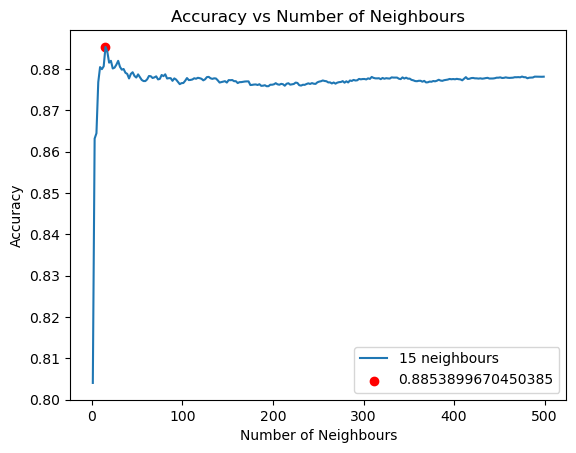

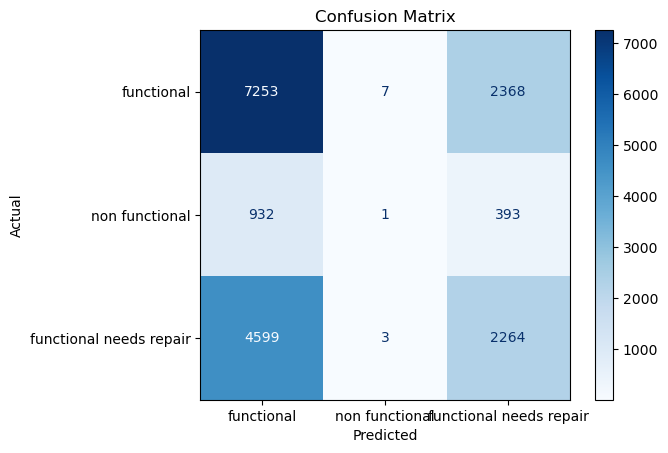

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

# Find the neighbour with the highest accuracy
heighest_accuracy_neighbour = knn_neighbours[accuracy_test_list.index(max(accuracy_test_list))]

# Train the KNN classifier with the best neighbour
knn = KNeighborsClassifier(n_neighbors=heighest_accuracy_neighbour)
knn.fit(train_x, train_y)

# Predict the test set
prediction = knn.predict(test_x)

# Compute the confusion matrix
cm = confusion_matrix(test_y, prediction)

# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()